## Import Libraries

In [1]:
import matplotlib.pyplot as plt
from numpy import sin, cos, sqrt, pi, linspace, arange, deg2rad, rad2deg
from numpy import array, arcsin, arccos,sort, argsort, argwhere, argmin, argmax, interp, concatenate, zeros
from scipy.spatial import distance
import warnings
from mpl_toolkits import mplot3d
from numpy import linalg as LA
warnings.simplefilter('ignore')

def sec(x):
    return 1/cos(x)
def tan(x):
    return sin(x)/cos(x)

## Initialize Parameters 

A :  [2.4 2.4 4.5]
B :  [0.78701681 2.68441246 0.        ]
Theta: 20.000000000000004


(-4.014995393301708, 4.014999780633414, -4.014989580089784, 4.014998354750561)

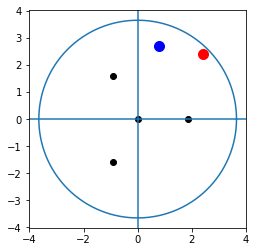

In [2]:
n      = 1.33 #-------------------------------------------- Refractive index of medium
c      = 299792458/n #------------------------------------- Speed of light in medium
R      = 7.3/2 #------------------------------------------- Radius of tank
v      = n * c #------------------------------------------- Particle Speed
h      = 4.5 #--------------------------------------------- Tank height
times  = linspace(1e-11,1e-7,100000)
c1     = (0, 0, 0)  #------------------------------------ Central    PMT number 1 
c2     = (1.85*cos(2*pi/3) , 1.85*sin(2*pi/3), 0) #------ Non-Radial PMT number 2
c3     = (1.85*cos(4*pi/3) , 1.85*sin(4*pi/3), 0) #------ Non-Radial PMT number 3
c4     = (1.85*cos(0     ) , 1.85*sin(0     ), 0) #------ Radial     PMT number 4

x1,y1  = (2.4,2.4) #----------------------------------------- Coordinates of particle at top tanker lid      #------PARAM
theta  = deg2rad(160)   #----------------------------------------- Zenith  varies from 90 to 180                    #------PARAM
phi    = deg2rad(-10)   #----------------------------------------- Azimuth varies from  0 to 360                    #------PARAM
x2     = x1 + h * tan(theta) * cos(phi) # ------------------- Calculate bottom x coordinate
y2     = y1 + h * tan(theta) * sin(phi) #-------------------- Calculate bottom y coordinate

A      = array([x1,y1,h]) #---------------- Entry Point of muon
B      = array([x2,y2,0]) #---------------- Exit point of muon
AB     = B-A #------------------------------------------------ Displacement vector of muon
nAB    = LA.norm(AB) #---------------------------------------- Path length traveled by muon
den    = c*c - v*v
theta2 = pi - theta
del theta
theta     = theta2
print('A : ', A) ; print('B : ', B) ;print('Theta:',rad2deg(theta))
angs   = linspace(0,6.28,1000)
xs,ys  = R*cos(angs), R*sin(angs)
#Plot cylinder transverse cross-section
plt.plot(xs,ys)
plt.scatter(A[0],A[1],c='r',s=100) ; plt.scatter(B[0],B[1],c='b',s=100);
plt.scatter(c1[0],c1[1],c='k'); plt.scatter(c2[0],c2[1],c='k');
plt.scatter(c3[0],c3[1],c='k'); plt.scatter(c4[0],c4[1],c='k')
plt.axhline(0)
plt.axvline(0)
plt.axis('scaled')

In [3]:
def entry_brightness(L,c,v,alpha,den):
    tt     = L/c
    aterm  = (c*c*tt*v-L*v*v*cos(alpha))
    bterm  = (v*v*( -L*L*v*v + c*c*L*L + c*c*tt*tt*v*v - 2*c*c*L*tt*v*cos(alpha) + L*L*v*v*cos(alpha)**2))
    xp     = (aterm + sqrt(bterm)) / den
    #xm     = (aterm - sqrt(bterm)) / den
    zp     = (nAB-xp)*cos(theta)
    #zm     = (nAB-xm)*cos(theta)

    cterm  = (c*c*v)
    dterm  = (c*c*v*v*v*(tt*v-L*cos(alpha)))
    vp     = (cterm + (dterm/sqrt(bterm))) / den
    #vm     = (cterm - (dterm/sqrt(bterm))) / den 

    rp     = xp/nAB
    #rm     = xm/nAB
    Xp     = array([ (1-rp)*A[0] + rp*B[0] , (1-rp)*A[1] + rp*B[1] , (1-rp)*A[2]+rp*B[2]])
    #Xm     = array([ (1-rm)*A[0] + rm*B[0] , (1-rm)*A[1] + rm*B[1] , (1-rm)*A[2]+rm*B[2]])

    kp     = LA.norm(D-Xp) #sqrt( L*L + xp*xp - 2*L*xp*cos(alpha) )
    km     = LA.norm(D-Xm) #sqrt( L*L + xm*xm - 2*L*xm*cos(alpha) )

    betap  = alpha #arccos(sum((D-Xp)*(B-Xp))/(kp*LA.norm(B-Xp))) #pi - arccos( (xp*xp + kp*kp - L*L) / (2*xp*kp) )  
    #betam  = arccos(sum((D-Xm)*(B-Xm))/(km*LA.norm(B-Xm))) #pi - arccos( (xm*xm + km*km - L*L) / (2*xm*km) )  

    vtp    = vp*sin(betap)
    #vtm    = vm *sin(betam )
    omegap = vtp / kp
    #omegam = vtm / km
    bp     = abs(omegap/(kp**2))
    #bm     = abs(omegam/(km**2))

    return bp

def plus_t_vs_x (a, b, color, label):
    plt.plot(a, b, c=color, ls='-' , lw=2.5, label=label)
def minus_t_vs_x(a, b, color, label):
    plt.plot(a, b, c=color, ls=(0,(5,4)), lw=2.5, label=label)
def both_t_vs_x (a1, b1, a2, b2, color, label):
    plt.plot(a1, b1, c=color, ls='-' , lw=2.5, label=label)
    plt.plot(a2, b2, c=color, ls=(0,(5,4)), lw=2.5)
    plt.xlabel(r'time since muon entry (in ns)',fontsize=18)
    plt.ylabel(r'image height $z_{\pm}$ from ground (in meters)', fontsize=18)
    plt.axhline(zc, c='k', ls=':')
    #if detector!=4:
    plt.text(26,zc+0.07, r'$z_C$ = {}'.format(round(zc,2)), fontsize=18)
    #else:
    #    plt.text(27,zc-0.22, r'$z_C$ = {}'.format(round(zc,2)), fontsize=18)
    
def plus_t_vs_b (a, b, color, label):
    plt.plot(a, b, c=color, ls='-', lw=2.5, label=label)
def minus_t_vs_b(a, b, color, label):
    plt.plot(a, b, c=color, ls=(0,(5,4)), lw=2.5, label=label)
def both_t_vs_b (a1, b1, a2, b2, color, label):
    plt.plot(a1, b1, c=color, ls='-' , lw=2.5, label=label)
    plt.plot(a2, b2, c=color, ls=(0,(5,4)), lw=2.5)
    plt.axhline(1,c='k',ls=':')
    plt.xlabel(r'time since muon entry (in ns)',fontsize=18)
    plt.ylabel(r'relative brightness ($b/b_{entry}$)', fontsize=18) 
    plt.yscale('log')
    
def plus_t_vs_ang(a, b, color, label):
    plt.plot(a, b, c=color, ls='-', lw=2.5, label=label)
def minus_t_vs_ang(a, b, color, label):
    plt.plot(a, b, c=color, ls=(0,(5,4)), lw=2.5, label=label)
def both_t_vs_ang(a1, b1, a2, b2, color, label):
    plt.plot(a1, b1, c=color, ls='-' , lw=2.5, label=label)
    plt.plot(a2, b2, c=color, ls=(0,(5,4)), lw=2.5)
    plt.axhline(gammac, c='k', ls=':')
    plt.xlabel(r'time since muon entry (in ns)',fontsize=18)
    plt.ylabel(r'angular locations $\phi_{\pm}\;(in\;degrees)$',fontsize=18)
    #if detector==4:
    plt.text(26,gammac+1, r'$\phi_C = %.2f ^{\circ}$'%gammac, fontsize=18)
    #else:#if detector==1:
    #    plt.text(30,gammac+1, r'$\phi_C = %.2f ^{\circ}$'%gammac, fontsize=18)
    
def plus_b_vs_ang(a, b, color, label):
    plt.plot(a, b, c=color, ls='-', lw=2.5, label=label)
def minus_b_vs_ang(a, b, color, label):
    plt.plot(a, b, c=color, ls=(0,(5,4)), lw=2.5, label=label)
def both_b_vs_ang(a1, b1, a2, b2, color, label):
    plt.plot(a1, b1, c=color, ls='-' , lw=2.5, label=label)
    plt.plot(a2, b2, c=color, ls=(0,(5,4)), lw=2.5)
    plt.axvline(gammac, c='k', ls=':')
    plt.axhline(1,c='k',ls=':')
    plt.xlabel(r'angular locations $\phi_{\pm}\;(in\;degrees)$',fontsize=18)
    plt.ylabel(r'relative brightness ($b/b_{entry}$)', fontsize=18) 
    plt.yscale('log')
    #if detector==1:
    plt.text(gammac+0.5, 1000, r'$\phi_C = %.2f ^{\circ}$'%gammac, fontsize=18)
    #elif detector==4:
    #    plt.text(gammac+0.5, 0.03, r'$\phi_C = %.2f ^{\circ}$'%gammac, fontsize=18)
    #elif detector==3:
    #    plt.text(gammac+0.5, 0.01, r'$\phi_C = %.2f ^{\circ}$'%gammac, fontsize=18)

In [4]:
%matplotlib
plt.figure()

#plotme    = 't vs b'
#plotme    = 't vs x'
plotme    = 't vs ang'
#plotme    = 'b vs ang'

detector_coordinates = [c1,c2,c3,c4]
colors               = ['k','r','b','g']
detectors            = [1,2,3,4]
labels               = ['Central Detector', "Detector 2",'Detector 3','Detector 4']

for D, color, detector, mylabel in zip(detector_coordinates, colors, detectors, labels):
    
    print("==============================================")
    print("Detector ", detector)
    
    AD    = D - A
    BD    = D - B
    L     = LA.norm(AD)
    nBD   = LA.norm(BD)
    M     = nBD
    alpha = arccos((sum(AD*AB))/(L*nAB)) # OR use alpha1 = arccos( (L*L+x*x-k*k)/(2*x*L) )
    omgbeta = arccos((sum(BD*AB))/(nBD*nAB))
    xc    = L*cos(alpha) - (c*L*sin(alpha))/sqrt(-den)
    zc    = (nAB-xc)*cos(theta)
    print('ZC: ',round(zc,3), " m")
    zc2   = h - xc*cos(theta)
    print("ZC2: ", zc2)
    T,XP,XM,ZP,ZM,BP,BM,GAMMAP,GAMMAM = [],[],[],[],[],[],[],[],[]
    
    for iii,t in enumerate(times):

        x      = v*t
        ratio  = x/nAB
        X      = array([ (1-ratio)*A[0] + ratio*B[0] , (1-ratio)*A[1] + ratio*B[1] , (1-ratio)*A[2]+ratio*B[2]   ])
        AX,DX  = X - A, X-D
        k      = LA.norm(DX)
        t1,t2  = t, k/c
        tt     = t1 + t2
        
        aterm  = (c*c*tt*v-L*v*v*cos(alpha))
        bterm  = (v*v*( -L*L*v*v + c*c*L*L + c*c*tt*tt*v*v - 2*c*c*L*tt*v*cos(alpha) + L*L*v*v*cos(alpha)**2))
        xp     = (aterm + sqrt(bterm)) / den
        xm     = (aterm - sqrt(bterm)) / den
        zp     = (nAB-xp)*cos(theta)
        zm     = (nAB-xm)*cos(theta)
        
        cterm  = (c*c*v)
        dterm  = (c*c*v*v*v*(tt*v-L*cos(alpha)))
        vp     = (cterm + (dterm/sqrt(bterm))) / den
        vm     = (cterm - (dterm/sqrt(bterm))) / den 
        
        rp     = xp/nAB
        rm     = xm/nAB
        Xp     = array([ (1-rp)*A[0] + rp*B[0] , (1-rp)*A[1] + rp*B[1] , (1-rp)*A[2]+rp*B[2]])
        Xm     = array([ (1-rm)*A[0] + rm*B[0] , (1-rm)*A[1] + rm*B[1] , (1-rm)*A[2]+rm*B[2]])
        
        kp     = LA.norm(D-Xp) #sqrt( L*L + xp*xp - 2*L*xp*cos(alpha) )
        km     = LA.norm(D-Xm) #sqrt( L*L + xm*xm - 2*L*xm*cos(alpha) )
        
        betap  = arccos(sum((D-Xp)*(B-Xp))/(kp*LA.norm(B-Xp))) #pi - arccos( (xp*xp + kp*kp - L*L) / (2*xp*kp) )  
        betam  = arccos(sum((D-Xm)*(B-Xm))/(km*LA.norm(B-Xm))) #pi - arccos( (xm*xm + km*km - L*L) / (2*xm*km) )  
        
        vtp    = vp*sin(betap)
        vtm    = vm *sin(betam )
        omegap = vtp / kp
        omegam = vtm / km
        bp     = abs(omegap/(kp**2))
        bm     = abs(omegam/(km**2))
        
        gammap  = arccos(sum((D-Xp)*BD)/(kp*LA.norm(BD))) #arccos( (L*L + kp*kp - xp*xp ) / (2*L*kp) )
        gammam  = arccos(sum((D-Xm)*BD)/(km*LA.norm(BD))) #arccos( (L*L + km*km - xm*xm ) / (2*L*km) )
        
        XP.append(xp); XM.append(xm); BP.append(bp); BM.append(bm); GAMMAP.append(rad2deg(gammap)); GAMMAM.append(rad2deg(gammam)); T.append(tt); ZP.append(zp); ZM.append(zm)

    XP, XM, BP, BM, T, GAMMAP, GAMMAM, ZP, ZM = array(XP), array(XM), array(BP), array(BM), array(T), array(GAMMAP), array(GAMMAM), array(ZP), array(ZM)
    #hh = BP[0] #Or use this in place of den_bright
    TT  = T * 1e+9
    
    rc     = xc/nAB
    Xc     = array([ (1-rc)*A[0] + rc*B[0] , (1-rc)*A[1] + rc*B[1] , (1-rc)*A[2]+rc*B[2]])
    kc     = LA.norm(D-Xc) #sqrt( L*L + xc*xc - 2*L*xc*cos(alpha) )
    gammac = rad2deg( arccos(sum((D-Xc)*BD)/(kc*LA.norm(BD))) )
    print("Phi_C with numerical techniques: ",gammac)
    
    mynum = (-2*nAB*zc) + (nAB*nAB+M*M+L*L)*cos(theta) + 2*L*cos(alpha)*(zc-nAB*cos(theta))
    myden = (2*M*cos(theta))*sqrt(L*L - 2*L*cos(alpha)*(nAB - zc/cos(theta)) + (nAB-zc/cos(theta))**2)
    print("Phi_C with formula: ",rad2deg(arccos(mynum/myden)))

    cond  = ( ((ZP>=0) & (ZP<=h)) | ((ZM>=0) & (ZM<=h)) )
    TT    = TT[cond] ; BP = BP[cond] ; BM = BM[cond] ; ZP = ZP[cond]
    ZM    = ZM[cond] ; GAMMAP = GAMMAP[cond] ; GAMMAM = GAMMAM[cond]
    
    conp     = [(ZP>=0) & (ZP<=h)]
    conm     = [(ZM>=0) & (ZM<=h)]
    pluslen  = len (ZP[conp])
    minuslen = len (ZM[conm])
    
    if detector==1:
        Bnorm = entry_brightness(L,c,v,alpha,den) # OR hh
        
    if pluslen == 0:
        if minuslen == 0:
            print("Images outside tank. Skipping...")
        else:
            print('One image moving towards bottom B.')
            TT,ZM,BM,GAMMAM = TT[conm], ZM[conm], BM[conm]/Bnorm, GAMMAM[conm]
            nkt = TT; nka=GAMMAM
            if   plotme=='t vs b'  :minus_t_vs_b  (a=TT, b=BM    , color=color, label=mylabel)
            elif plotme=='t vs x'  :minus_t_vs_x  (a=TT, b=ZM    , color=color, label=mylabel)
            elif plotme=='t vs ang':minus_t_vs_ang(a=TT, b=GAMMAM, color=color, label=mylabel)
            elif plotme=='b vs ang':minus_b_vs_ang(a=GAMMAM, b=BM, color=color, label=mylabel)
    
    elif pluslen != 0:
        if minuslen == 0:
            print('One image moving towards entry A.')
            TT,ZP,BP,GAMMAP = TT[conp], ZP[conp], BP[conp]/Bnorm, GAMMAP[conp]
            
            if   plotme=='t vs b'  :plus_t_vs_b  (a=TT, b=BP    , color=color, label=mylabel)
            elif plotme=='t vs x'  :plus_t_vs_x  (a=TT, b=ZP    , color=color, label=mylabel)
            elif plotme=='t vs ang':plus_t_vs_ang(a=TT, b=GAMMAP, color=color, label=mylabel)
            elif plotme=='b vs ang':plus_b_vs_ang(a=GAMMAP, b=BP, color=color, label=mylabel)
        else:
            print('Both images moving')
            TTm, ZM, BM, GAMMAM = TT[conm], ZM[conm], BM[conm]/Bnorm, GAMMAM[conm]
            TTp, ZP, BP, GAMMAP = TT[conp], ZP[conp], BP[conp]/Bnorm, GAMMAP[conp]
            if detector==4:
                nktg = TTm
            
            if   plotme=='t vs b'  :both_t_vs_b  (a1=TTp, b1=BP    , a2=TTm, b2=BM    , color=color, label=mylabel)
            elif plotme=='t vs x'  :both_t_vs_x  (a1=TTp, b1=ZP    , a2=TTm, b2=ZM    , color=color, label=mylabel)
            elif plotme=='t vs ang':both_t_vs_ang(a1=TTp, b1=GAMMAP, a2=TTm, b2=GAMMAM, color=color, label=mylabel)
            elif plotme=='b vs ang':both_b_vs_ang(a1=GAMMAP, b1=BP, a2=GAMMAM, b2=BM,   color=color, label=mylabel)

    if detector==3:
        plems, mlems, mm = TTp, TTm, TT
plt.tick_params(axis='both', direction='in', labelsize=18, which='both')
plt.legend(prop={'size': 14}) #loc='upper right', 
#plt.ylim(0,4064)
plt.show()

Using matplotlib backend: Qt5Agg
Detector  1
ZC:  2.896  m
ZC2:  2.896399992416372
Phi_C with numerical techniques:  46.588933511996686
Phi_C with formula:  46.588933511996665
Both images moving
Detector  2
ZC:  1.618  m
ZC2:  1.618453398587985
Phi_C with numerical techniques:  34.10005874215125
Phi_C with formula:  34.10005874215129
Both images moving
Detector  3
ZC:  4.632  m
ZC2:  4.631799026966814
Phi_C with numerical techniques:  44.75243518116179
Phi_C with formula:  44.75243518116181
One image moving towards bottom B.
Detector  4
ZC:  3.53  m
ZC2:  3.5302290581989415
Phi_C with numerical techniques:  59.078246701219435
Phi_C with formula:  59.07824670121942
Both images moving


In [ ]:
TTm

In [ ]:
max(plems)

In [ ]:
max(mlems)

In [ ]:
max(TT), min(TT)

In [ ]:
min(nkt), max(nkt)

In [ ]:
nktg

In [ ]:
max(nktg)